In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [25]:
df=pd.read_csv("/content/train - train (2).csv")
df=df.fillna(method="bfill")
df

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,5.6
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...
31522,35022,2017,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,35032,2017,2.0,27.0,16.0,75.0,15.9,1014,0.0,SW,2.9
31524,35035,2017,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,35042,2017,2.0,28.0,2.0,9.0,8.6,1016,0.0,NNE,0.9


In [26]:
dummies = pd.get_dummies(df['wind_direction'])
df = df.drop('wind_direction',1)
df = pd.concat([df, dummies], axis=1)

In [27]:

for x in df.index:
  if df.loc[x,"month"]<1:
    df.loc[x,"month"]=None
  try:
    df.loc[x,"year"]=int(df.loc[x,"year"])
    
  except:
    df.loc[x,"year"]=None
  try:
    df.loc[x,"pressure"]=float(df.loc[x,"pressure"])
  except:
    df.loc[x,"pressure"]=None



  



  

In [28]:
df.head()


,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,2013,NaN,1.0,0.0,4.0,-0.7,None,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,None,NaN,1.0,1.0,8.0,-1.1,1023.2,0.0,5.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,5.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:

df=df.interpolate()
df=df.fillna(method="bfill")

df.head(8)


,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,2013,3.0,1.0,0.0,4.0,-0.7,1023.2,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,2013,3.0,1.0,1.0,8.0,-1.1,1023.2,0.0,5.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,5.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,5,2013,3.0,1.0,6.0,5.0,-2.2,1025.6,0.0,3.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,6,2013,3.0,1.0,6.0,3.0,-2.6,1026.5,0.0,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,7,2013,3.0,1.0,7.0,3.0,-1.6,1027.4,0.0,3.8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [30]:
df.isnull().sum().sum()


0

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
df[['year','month','day','hour','PM2.5','temperature','pressure']]=scaling.fit_transform(df[['year','month','day','hour','PM2.5','temperature','pressure']])


In [41]:
df.head()

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0.0,0.181818,0.994725,0.996454,1.575680e-08,0.280977,0.997189,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0.0,0.181818,0.994725,0.996609,7.878400e-08,0.273997,0.997189,0.0,5.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.0,0.181818,0.994725,0.996763,6.302720e-08,0.273997,0.997234,0.0,5.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,0.0,0.181818,0.994725,0.996917,4.727040e-08,0.268761,0.997383,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,0.0,0.181818,0.994725,0.997071,0.000000e+00,0.258290,0.997488,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# nor_list=['']
# dt=df.drop('pressure', axis=1)
# df_norm = (dt-dt.min())/(dt.max()-dt.min())
# df_norm = pd.concat((df_norm, df.pressure), 1)
# df_norm.head()

In [43]:
df.mean().mean()


623.1908803802986

In [44]:
df.median().median()

0.0

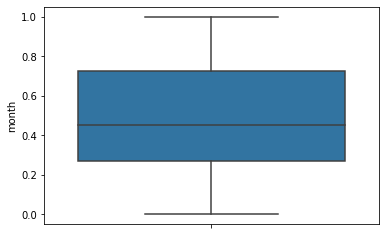

In [45]:
sns.boxplot(y='month',data=df)

In [46]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [47]:
df

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0.0,0.181818,0.994725,0.996454,1.575680e-08,0.280977,0.997189,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0.0,0.181818,0.994725,0.996609,7.878400e-08,0.273997,0.997189,0.0,5.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.0,0.181818,0.994725,0.996763,6.302720e-08,0.273997,0.997234,0.0,5.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,0.0,0.181818,0.994725,0.996917,4.727040e-08,0.268761,0.997383,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,0.0,0.181818,0.994725,0.997071,0.000000e+00,0.258290,0.997488,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31522,35022,1.0,0.090909,0.999297,0.997379,1.213274e-06,0.287958,0.996621,0.0,0.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31523,35032,1.0,0.090909,0.999297,0.998921,1.134490e-06,0.570681,0.995813,0.0,2.9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
31524,35035,1.0,0.090909,0.999297,0.999383,7.563264e-07,0.493892,0.995828,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
31525,35042,1.0,0.090909,0.999472,0.996763,9.454080e-08,0.443281,0.996112,0.0,0.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


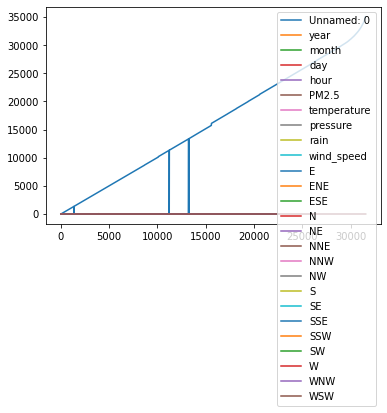

In [49]:
df.plot()
plt.show()

In [50]:
df

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0.0,0.181818,0.994725,0.996454,1.575680e-08,0.280977,0.997189,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0.0,0.181818,0.994725,0.996609,7.878400e-08,0.273997,0.997189,0.0,5.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.0,0.181818,0.994725,0.996763,6.302720e-08,0.273997,0.997234,0.0,5.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,0.0,0.181818,0.994725,0.996917,4.727040e-08,0.268761,0.997383,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,0.0,0.181818,0.994725,0.997071,0.000000e+00,0.258290,0.997488,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31522,35022,1.0,0.090909,0.999297,0.997379,1.213274e-06,0.287958,0.996621,0.0,0.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31523,35032,1.0,0.090909,0.999297,0.998921,1.134490e-06,0.570681,0.995813,0.0,2.9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
31524,35035,1.0,0.090909,0.999297,0.999383,7.563264e-07,0.493892,0.995828,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
31525,35042,1.0,0.090909,0.999472,0.996763,9.454080e-08,0.443281,0.996112,0.0,0.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


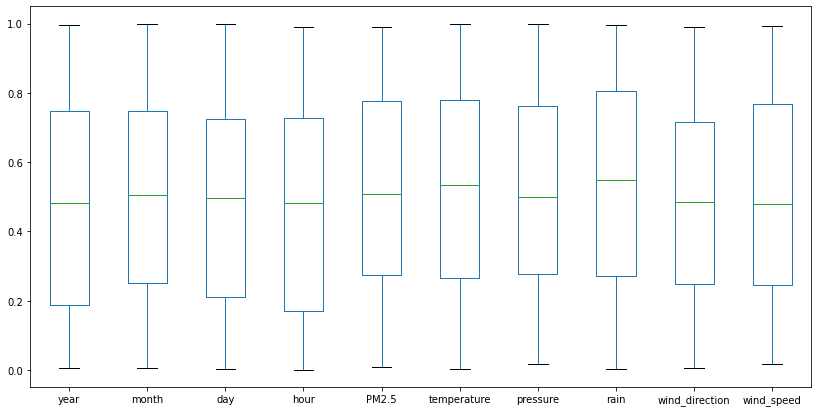

In [51]:
df = pd.DataFrame(np.random.rand(200,10), columns=["year", "month", "day","hour","PM2.5","temperature","pressure","rain","wind_direction","wind_speed"])
plt.rcParams["figure.figsize"] = (14,7)
df.plot.box();
#31527 rows × 11 columns